<a href="https://colab.research.google.com/github/Metodoscomputacionales1/Metodos1_PedroAngarita_SimonUribe/blob/main/Parcial1/Parcial_1_SUU_%26_PAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

def factorial(n):

  if n==0 or n == 1:
    return 1

  else:

    f = 1
    it = 1 # Iterador
    while it <= n:
      f *= it
      it += 1

    return f

def GetNewtonMethod(f,df,xn,itmax=1000,precision=1e-16):

  error = 1
  it = 0

  while error > precision and it < itmax:
    try:
      xn1 = xn - f(xn)/df(f,xn)
      error = np.abs(f(xn)/df(f,xn))
    except ZeroDivisionError:
      print('Division by zero error')
    xn = xn1
    it += 1

  if it == itmax:
    return False
  else:
    return xn

def GetAllRoots(x,f, df, tolerancia = 16):

  Roots = np.array([])

  for i in x:

    root = GetNewtonMethod(f,df,i)

    if root != False:

      croot =round(root, tolerancia)

      if croot not in Roots:
        Roots = np.append(Roots,croot)

  Roots.sort()

  return Roots

def funcion (x):
  return sym.exp(x)

def Derivada(f,x,h=1e-5):
  return (f(x+h) - f(x-h))/(2*h)

def Lagerre (x,funcion,n):
  polinomios=[]
  for i in range(1,n):
    base=funcion(x)/factorial(i)
    f=(x**i)*sym.exp(-x)
    polinomio=base*sym.diff(f,x,i)
    polinomios.append(polinomio)
  return polinomios

x=sym.Symbol("x", real=True)
polinomios=Lagerre(x,funcion,6)
X=np.linspace(-10,10,50)
for i in range(len(polinomios)):
  f=sym.lambdify(x,polinomios[i], "sympy")
  print(GetAllRoots(X,f,Derivada))







[(-x*exp(-x) + exp(-x))*exp(x), x**2/2 - 2*x + 1, -x**3/6 + 3*x**2/2 - 3*x + 1, x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1, -x**5/120 + 5*x**4/24 - 5*x**3/3 + 5*x**2 - 5*x + 1]
[1.00000000000000]
[0.58578644 3.41421356]
[0.41577456 0.41577456 2.29428036]
[0.32254769 0.32254769 1.7457611  4.5366203 ]
[0.26356032 0.26356032 0.26356032 1.41340306 1.41340306 3.59642577
 3.59642577 3.59642577]


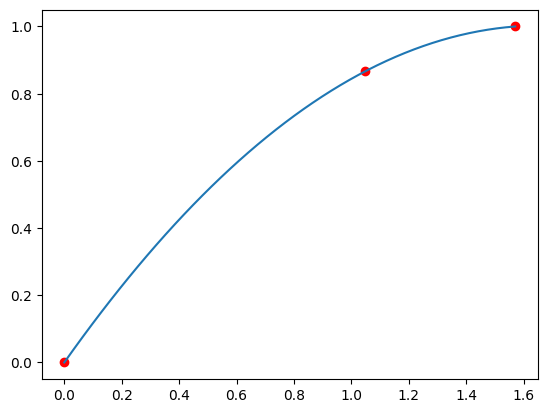

Estimacion: 
0.418208934443120
Eror: 
0.0355255020780303
Error teorico: 
0.00482812027379507
No son muy consistentes


In [114]:
#Conjuntos de soporte
X=[0, np.pi/3, np.pi/2]

def sen(x):
  return np.sin(x)

Y=sen(X)

x = sym.Symbol('x',real=True)

def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L

def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):

    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

x0=np.linspace(X[0], X[-1], 50)
y0=Interpolate(x0,X,Y)
plt.plot(x0,y0)
plt.scatter(X,Y, color="r")
plt.show()

#Estimacion:
I=Interpolate(x,X,Y)
print("Estimacion: ")
print(I.subs(x, np.pi/8))

#Error:
E=abs(np.sin(np.pi/8)-I.subs(x, np.pi/8))
print("Eror: ")
print(E)

e=(sen(np.pi/8)*(x)*(x-np.pi/3)*(x-np.pi/2))/(24)
print("Error teorico: ")
print(e.subs(x,np.pi/8))
print("No son muy consistentes")
